In [9]:
import pandas as pd

from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split


In [10]:
regression = pd.read_csv("../data/regression_preprocessed_data")
classification = pd.read_csv("../data/classification_preprocessed_data")

In [11]:
X_reg = regression.drop(columns= 'price')
y_reg = regression['price']

X_cl = classification.drop(columns= 'Fire Alarm')
y_cl = classification['Fire Alarm']

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

In [24]:
def classification_metrics(X_cl):
    X_cl_train, X_cl_test, y_cl_train, y_cl_test = train_test_split(X_cl, y_cl[:10000], test_size=.3)

    gbc= GradientBoostingClassifier()
    gbc.fit(X_cl_train, y_cl_train)
    y_pred = gbc.predict(X_cl_test)

    print(f'confusion matrix: \n{confusion_matrix(y_pred, y_cl_test)}')
    print(f'accuracy: {accuracy_score(y_pred, y_cl_test)}')

In [14]:
from sklearn.ensemble import BaggingRegressor

In [15]:
def regression_metrics(X_reg):
    X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg,y_reg, test_size=.3)
    
    bg = BaggingRegressor()

    bg.fit(X_reg_train, y_reg_train)
    y_pred = bg.predict(X_reg_test)

    print(f'r2: {r2_score(y_pred, y_reg_test)}')
    print(f'mse: {mean_squared_error(y_pred, y_reg_test)}')

In [79]:
regression_metrics(X_reg)

r2: 0.7027430956400779
mse: 240614708020642.47


In [9]:
classification_metrics(X_cl)

confusion matrix: 
[[ 5372     5]
 [   10 13402]]
accuracy: 0.9992016605460642


# Отбор признаков

### VarianceThreshold: Отбор, основанный на дисперсии

In [10]:
from sklearn.feature_selection import VarianceThreshold

**Регрессия**

In [11]:
X_reg.std()

area                                 637.515522
latitude                               0.109459
longitude                              0.058669
bedrooms                               0.750140
bathrooms                              0.763236
balcony                                1.291977
parking                                1.291977
furnished_status                       0.379643
lift                                   1.291977
type_of_building_Flat                  0.252284
type_of_building_Individual House      0.252284
status_False                           0.021928
status_True                            0.021928
neworold_False                         0.323020
neworold_True                          0.323020
dtype: float64

*Без масштабирования признаков*

In [12]:
vt = VarianceThreshold(0.5)
X_reg_vt = vt.fit_transform(X_reg)
X_reg_vt.shape

(6237, 6)

In [13]:
X_reg_vt = pd.DataFrame(X_reg_vt, columns=vt.get_feature_names_out())
X_reg_vt.head()

,area,bedrooms,bathrooms,balcony,parking,lift
0,629.0,2.0,2.0,0.0,0.0,0.0
1,974.0,3.0,2.0,0.0,0.0,0.0
2,968.0,3.0,3.0,0.0,0.0,0.0
3,629.0,2.0,2.0,2.0,2.0,2.0
4,1090.0,2.0,2.0,0.0,0.0,0.0


In [14]:
regression_metrics(X_reg_vt)

r2: 0.24797161489457686
mse: 430632331309535.44


Видим, что результат упал довольно значительно

*С масштабирования признаков*

In [19]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [16]:
X_reg_scaled = MinMaxScaler().fit_transform(X_reg)

X_reg_scaled = pd.DataFrame(X_reg_scaled, columns= X_reg.columns)

In [17]:
X_reg_scaled.std()

area                                 0.085036
latitude                             0.181667
longitude                            0.132213
bedrooms                             0.093767
bathrooms                            0.076324
balcony                              0.161497
parking                              0.161497
furnished_status                     0.379643
lift                                 0.161497
type_of_building_Flat                0.252284
type_of_building_Individual House    0.252284
status_False                         0.021928
status_True                          0.021928
neworold_False                       0.323020
neworold_True                        0.323020
dtype: float64

In [18]:
mean_std = X_reg_scaled.std().mean()
mean_std

0.17517370165350496

In [19]:
vt_reg_scaled = VarianceThreshold(mean_std / 10)
X_reg_scaled_vt = vt_reg_scaled.fit_transform(X_reg_scaled)
X_reg_scaled_vt.shape

(6237, 9)

In [20]:
X_reg_scaled_vt = pd.DataFrame(X_reg_scaled_vt, columns= vt_reg_scaled.get_feature_names_out())
regression_metrics(X_reg_scaled_vt)

r2: -0.4236360029252868
mse: 659389683083323.4


С MinMax масштабированием результат стал хуже по сравнению с результатом без мастабирования

In [21]:
X_reg_scaled = StandardScaler().fit_transform(X_reg)

X_reg_scaled = pd.DataFrame(X_reg_scaled, columns= X_reg.columns)

In [22]:
vt_reg_scaled = VarianceThreshold(1)
X_reg_scaled_vt = vt_reg_scaled.fit_transform(X_reg_scaled)
X_reg_scaled_vt.shape

(6237, 5)

In [23]:
X_reg_scaled_vt = pd.DataFrame(X_reg_scaled_vt, columns= vt_reg_scaled.get_feature_names_out())
regression_metrics(X_reg_scaled_vt)

r2: -12.59614030566075
mse: 770236206612561.2


StandartScaler тоже не улучшил результат

**Классификация**

In [24]:
X_cl.std()

Temperature      14.344456
Humidity          8.851486
TVOC           7780.803394
eCO2           1904.714566
Raw H2          272.289864
Raw Ethanol     609.513156
Pressure          1.330882
PM1.0           922.524245
PM2.5          1971.581818
NC0.5          4265.661251
NC1.0          2210.259493
NC2.5          1083.383189
dtype: float64

In [25]:
mean_std = X_cl.std().mean()

vt = VarianceThreshold(mean_std / 10)
X_cl_vt = vt.fit_transform(X_cl)
X_cl_vt.shape

(62630, 10)

In [26]:
X_cl_vt = pd.DataFrame(X_cl_vt, columns= vt.get_feature_names_out())
classification_metrics(X_cl_vt)

confusion matrix: 
[[ 5346     4]
 [   24 13415]]
accuracy: 0.9985097663526531


Да, точность упала на капельку, но мы избавились от 2 признаков

*С маштабированием*

In [27]:
X_cl_scaled = MinMaxScaler().fit_transform(X_cl)
X_cl_scaled = pd.DataFrame(X_cl_scaled, columns= X_cl.columns)
X_cl_scaled.std()

Temperature    0.175060
Humidity       0.137318
TVOC           0.129680
eCO2           0.031958
Raw H2         0.086855
Raw Ethanol    0.100035
Pressure       0.147728
PM1.0          0.064361
PM2.5          0.043396
NC0.5          0.069381
NC1.0          0.042575
NC2.5          0.036081
dtype: float64

In [28]:
mean_std = X_cl_scaled.std().mean()
mean_std

0.08870227107619662

In [29]:
vt = VarianceThreshold(mean_std / 10)
X_cl_vt = vt.fit_transform(X_cl_scaled)
X_cl_vt.shape

(62630, 5)

In [30]:
X_cl_scaled_vt = pd.DataFrame(X_cl_vt, columns= vt.get_feature_names_out())
X_cl_scaled_vt

,Temperature,Humidity,TVOC,Raw Ethanol,Pressure
0,0.512692,0.723239,0.000000,0.525685,0.986014
1,0.512875,0.712535,0.000000,0.547185,0.987013
2,0.513046,0.701520,0.000000,0.565731,0.986347
3,0.513229,0.690971,0.000000,0.579682,0.986125
4,0.513412,0.681818,0.000000,0.591498,0.987013
...,...,...,...,...,...
62625,0.493629,0.078343,0.010417,0.861973,0.645799
62626,0.496253,0.079584,0.010200,0.865091,0.646687
62627,0.498865,0.079119,0.010450,0.864106,0.647686
62628,0.501501,0.082222,0.010633,0.861480,0.646909


In [31]:
classification_metrics(X_cl_scaled_vt)

confusion matrix: 
[[ 5400     4]
 [   16 13369]]
accuracy: 0.9989355473947522


Ух ты...понизили размерность с 12 до 5 и точность упала совсем незначительно. Это успех!

In [20]:
X_cl_scaled = StandardScaler().fit_transform(X_cl)
X_cl_scaled = pd.DataFrame(X_cl_scaled, columns= X_cl.columns)
X_cl_scaled.std()

Temperature    1.000008
Humidity       1.000008
TVOC           1.000008
eCO2           1.000008
Raw H2         1.000008
Raw Ethanol    1.000008
Pressure       1.000008
PM1.0          1.000008
PM2.5          1.000008
NC0.5          1.000008
NC1.0          1.000008
NC2.5          1.000008
dtype: float64

## SelectKBest

In [33]:
from sklearn.feature_selection import SelectKBest

**Регрессия**

In [34]:
skb = SelectKBest(k= 5)
X_skb = skb.fit_transform(X_reg, y_reg)
regression_metrics(X_skb)

r2: 0.6071329376681625
mse: 235813182328276.1


Вау: с 12 до 5, значительнейшее улучшение по сравнению с VarienceThreshold

In [35]:
skb = SelectKBest(k= 3)
X_skb = skb.fit_transform(X_reg, y_reg)
regression_metrics(X_skb)

r2: 0.6970937315918835
mse: 231139266358046.22


In [85]:
skb = SelectKBest(k= 2)
X_skb = skb.fit_transform(X_reg, y_reg)
regression_metrics(X_skb)

r2: 0.5593102287769226
mse: 268158764132961.0


ВАУ: до трёх признаков - это прям стояще, потеряв точность в стотысячной доле

In [36]:
skb_best_X = pd.DataFrame(X_skb, columns= skb.get_feature_names_out())
skb_best_X

,area,latitude,bathrooms
0,629.0,19.032800,2.0
1,974.0,19.032800,2.0
2,968.0,19.085600,3.0
3,629.0,19.155756,2.0
4,1090.0,19.177555,2.0
...,...,...,...
6232,810.0,19.138320,2.0
6233,1400.0,19.221920,3.0
6234,750.0,19.144320,2.0
6235,700.0,19.047201,2.0


**Классификация**

In [37]:
skb = SelectKBest(k= 5)
X_cl_skb = skb.fit_transform(X_cl, y_cl)
classification_metrics(X_cl_skb)

confusion matrix: 
[[ 5357     3]
 [   18 13411]]
accuracy: 0.9988823247644899


In [38]:
skb = SelectKBest(k= 2)
X_cl_skb = skb.fit_transform(X_cl, y_cl)
classification_metrics(X_cl_skb)

confusion matrix: 
[[ 4070   231]
 [ 1297 13191]]
accuracy: 0.9186758209590717


In [39]:
X_cl_skb_best = pd.DataFrame(X_cl_skb, columns= skb.get_feature_names_out())
X_cl_skb_best

,Humidity,Raw Ethanol
0,57.36,18520.0
1,56.67,18651.0
2,55.96,18764.0
3,55.28,18849.0
4,54.69,18921.0
...,...,...
62625,15.79,20569.0
62626,15.87,20588.0
62627,15.84,20582.0
62628,16.04,20566.0


Теперь даже можно визуализировать данные, состоящие из двух признаков

In [40]:
import matplotlib.pyplot as plt

In [42]:
X_cl_skb

array([[5.7360e+01, 1.8520e+04],
       [5.6670e+01, 1.8651e+04],
       [5.5960e+01, 1.8764e+04],
       ...,
       [1.5840e+01, 2.0582e+04],
       [1.6040e+01, 2.0566e+04],
       [1.6520e+01, 2.0543e+04]])

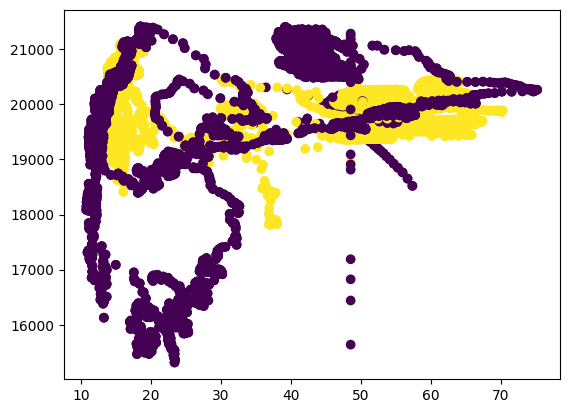

In [43]:
plt.scatter(X_cl_skb[:,0],  X_cl_skb[:,1], c= y_cl)

## Recursive Feature Elimination: Рекурсивный отбор признаков

In [44]:
from sklearn.feature_selection import RFE

**Regression**

In [45]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg,y_reg, test_size=.3)
lr.fit(X_reg_train, y_reg_train)

y_pred = lr.predict(X_reg_test)
r2_score(y_pred, y_reg_test)

0.5396245422149095

In [46]:
rfe_reg = RFE(estimator= lr, n_features_to_select=5, step=1)
X_reg_rfe = rfe_reg.fit_transform(X_reg, y_reg)
X_reg_rfe.shape

(6237, 5)

In [47]:
X_reg_rfe = pd.DataFrame(X_reg_rfe, columns= rfe_reg.get_feature_names_out())
X_reg_rfe

,latitude,longitude,bathrooms,balcony,lift
0,19.032800,72.896357,2.0,0.0,0.0
1,19.032800,72.896357,2.0,0.0,0.0
2,19.085600,72.909277,3.0,0.0,0.0
3,19.155756,72.846862,2.0,2.0,2.0
4,19.177555,72.849887,2.0,0.0,0.0
...,...,...,...,...,...
6232,19.138320,72.810020,2.0,0.0,0.0
6233,19.221920,72.854250,3.0,1.0,1.0
6234,19.144320,72.824111,2.0,0.0,0.0
6235,19.047201,72.872225,2.0,0.0,0.0


In [48]:
regression_metrics(X_reg_rfe)

r2: 0.49582021816391897
mse: 334081746834103.0


Очень неплохой результат...с учётом того, что мы скакнули с 12 до 5 и у Линейной модели выше была точность 0.48

**Classification**

In [49]:
X_cl_train, X_cl_test, y_cl_train, y_cl_test = train_test_split(X_cl, y_cl, test_size=.3)

gbc= GradientBoostingClassifier()
gbc.fit(X_cl_train, y_cl_train)
y_pred = gbc.predict(X_cl_test)

print(f'confusion matrix: \n{confusion_matrix(y_pred, y_cl_test)}')
print(f'accuracy: {accuracy_score(y_pred, y_cl_test)}')

confusion matrix: 
[[ 5372     4]
 [    7 13406]]
accuracy: 0.9994145510671137


In [50]:
rfe_cl = RFE(estimator= gbc, n_features_to_select=5, step=1).fit(X_cl, y_cl)

X_cl_rfe = pd.DataFrame(rfe_cl.transform(X_cl), columns=rfe_cl.get_feature_names_out())
X_cl_rfe

,TVOC,Raw Ethanol,Pressure,PM1.0,NC0.5
0,0.0,18520.0,939.735,0.00,0.00
1,0.0,18651.0,939.744,0.00,0.00
2,0.0,18764.0,939.738,0.00,0.00
3,0.0,18849.0,939.736,0.00,0.00
4,0.0,18921.0,939.744,0.00,0.00
...,...,...,...,...,...
62625,625.0,20569.0,936.670,0.63,4.32
62626,612.0,20588.0,936.678,0.61,4.18
62627,627.0,20582.0,936.687,0.57,3.95
62628,638.0,20566.0,936.680,0.57,3.92


In [51]:
classification_metrics(X_cl_rfe)

confusion matrix: 
[[ 5467     6]
 [   10 13306]]
accuracy: 0.9991484379158018


ВАУ...такой же результат, что и с изначальным кол-вом признаков, но только с 5-ю

In [52]:
rfe_cl = RFE(estimator= gbc, n_features_to_select=2, step=1).fit(X_cl, y_cl)

X_cl_rfe = pd.DataFrame(rfe_cl.transform(X_cl), columns=rfe_cl.get_feature_names_out())
classification_metrics(X_cl_rfe)

confusion matrix: 
[[ 4856   210]
 [  428 13295]]
accuracy: 0.9660439618925968


In [53]:
X_cl_rfe

,TVOC,Pressure
0,0.0,939.735
1,0.0,939.744
2,0.0,939.738
3,0.0,939.736
4,0.0,939.744
...,...,...
62625,625.0,936.670
62626,612.0,936.678
62627,627.0,936.687
62628,638.0,936.680


## Отбор признаков по значимости

**Regression**

<BarContainer object of 15 artists>

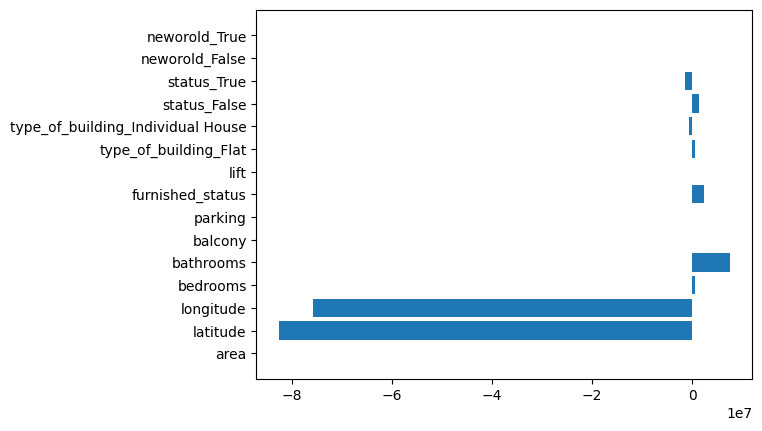

In [54]:
plt.barh(X_reg.columns, lr.coef_)

Возьмём топ 3 признака

In [82]:
X_reg_by_importance = X_reg[['area', 'latitude', 'bedrooms']]
regression_metrics(X_reg_by_importance)

r2: 0.6050450960527395
mse: 263078073474609.4


In [56]:
regression_metrics(X_reg)

r2: 0.7385851715871611
mse: 147091791942159.3


**Classification**

In [57]:
gbc.feature_importances_

array([2.49951774e-03, 6.60066964e-03, 2.17562966e-01, 3.33474207e-05,
       7.99036361e-04, 1.24001590e-02, 5.76988560e-01, 4.51845610e-02,
       2.26406192e-05, 1.37752400e-01, 1.47987776e-04, 8.15355530e-06])

<BarContainer object of 12 artists>

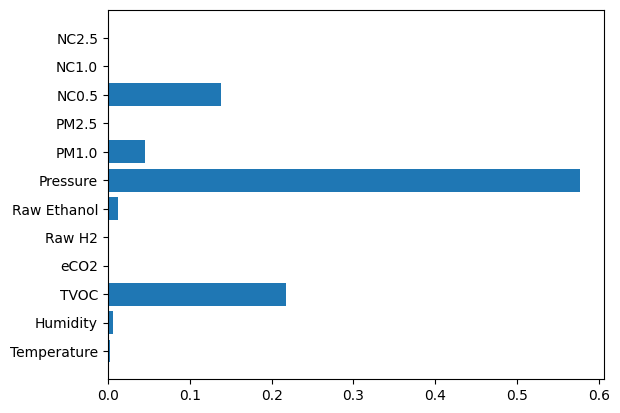

In [58]:
plt.barh(X_cl.columns, gbc.feature_importances_)

In [59]:
X_cl_by_importance = X_cl[['Pressure', 'TVOC']]
classification_metrics(X_cl_by_importance)

confusion matrix: 
[[ 4894   217]
 [  468 13210]]
accuracy: 0.9635424982702645


В принципе с той же точностью отработал, что и rfe на двух признаках

# Выделение признаков

## PCA

In [60]:
from sklearn.decomposition import PCA

**Regression**

In [61]:
pca_reg = PCA(n_components=4)
X_reg_pca = pca_reg.fit_transform(X_reg, y_reg)
X_reg_pca.shape

(6237, 4)

In [62]:
sum(pca_reg.explained_variance_ratio_)

0.999999046608441

In [63]:
regression_metrics(X_reg_pca)

r2: 0.23128127746164417
mse: 437659511037765.7


примерно вдважды ухушилось качество, регрессия очень не очень себя показывает

**Classification**

In [64]:
pca_cl = PCA(n_components=2)
X_cl_pca = pca_cl.fit_transform(X_cl, y_cl)
classification_metrics(X_cl_pca)

confusion matrix: 
[[ 5111  1312]
 [  294 12072]]
accuracy: 0.9145244557986055


Результат хуже, чем был раньше при двух признаках

## Нелинейные методы выделения признаков: TSNE, Isomap

In [16]:
from sklearn.manifold import TSNE, Isomap

## TSNE

**Regression**

In [66]:
tsne = TSNE(n_components=2)
X_reg_tsne = tsne.fit_transform(X_reg_scaled)

In [67]:
regression_metrics(X_reg_tsne)

r2: 0.402730092147632
mse: 317651048669441.5


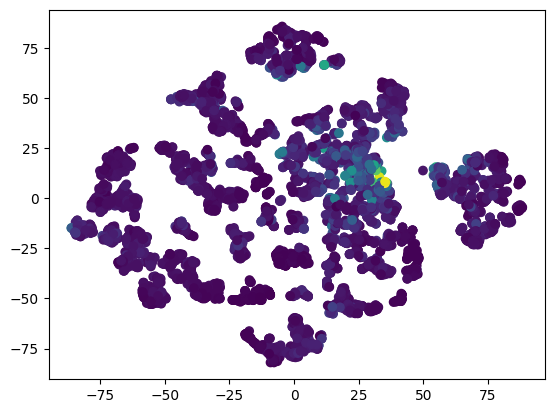

In [68]:
plt.scatter(X_reg_tsne[:,0], X_reg_tsne[:,1], c=y_reg)

Очень неплохой результат! Вроде бы самый лучший для случая двух признаков в регрессии

**Classsification**

In [69]:
tsne = TSNE(n_components=2)
X_cl_tsne = tsne.fit_transform(X_cl_scaled)

In [70]:
classification_metrics(X_cl_tsne)

confusion matrix: 
[[ 5174   287]
 [  147 13181]]
accuracy: 0.9769013784661238


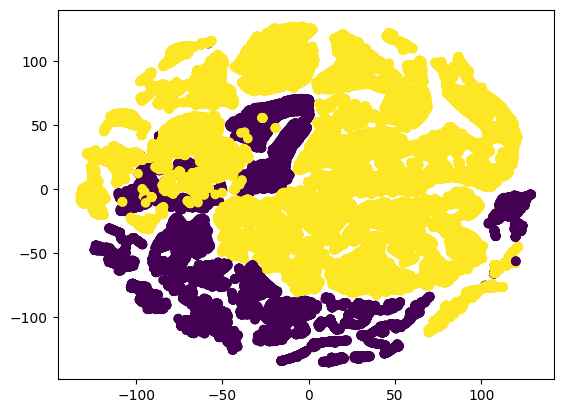

In [71]:
plt.scatter(X_cl_tsne[:,0], X_cl_tsne[:,1], c=y_cl)

## Isomap

**Regression**

In [72]:
isomap = Isomap(n_components=2)
X_reg_isomap = isomap.fit_transform(X_reg_scaled)

/home/timofey/.local/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 4 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/timofey/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/timofey/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/timofey/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])

In [73]:
regression_metrics(X_reg_isomap)

r2: 0.11674152653041281
mse: 476424391152388.4


**Classsification**

In [22]:
isomap = Isomap(n_components=2)
X_cl_isomap = isomap.fit_transform(X_cl_scaled[:10000])

/home/timofey/.local/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/timofey/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [25]:
classification_metrics(X_cl_isomap)

confusion matrix: 
[[ 934    3]
 [   0 2063]]
accuracy: 0.999


Поскольку во избежании ошибки пришлось снизить кол-во наблюдений будет несправедливо этот результат сравнивать с другими

**ВЫВОДЫ**

Среди всех методов наулучший результат:
- для регрессии показал SelectKBest на 2 и 3 признаках, показав оценку r2 0.55 и 0.69 соответственно
- для классификации все показали себя +\- стот выделить T-distributed Stochastic Neighbor Embedding (TSNE), показавший на двух признаках точность accuracy равную 0.97 